In [8]:
!pip3 install imgaug

In [0]:
import keras
import numpy as np
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from imgaug import augmenters as iaa
import random

In [0]:
def alexnet():
  model =Sequential()
  model.add(Conv2D(96,(11,11),input_shape = (224,224,1),strides =4,activation = 'relu'))
  model.add(MaxPooling2D((2,2),strides = 2))
  model.add(BatchNormalization())
            
  model.add(Conv2D(256,(11,11),strides =1,activation = 'relu'))
  model.add(MaxPooling2D((2,2),strides = 2))
  model.add(BatchNormalization())
  
  
  model.add(Conv2D(384,(3,3),strides =1,activation = 'relu'))
  model.add(BatchNormalization())
  
  
  model.add(Conv2D(384,(3,3),strides =1,activation = 'relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(256,(3,3),strides =1,activation = 'relu'))
  model.add(MaxPooling2D((2,2),strides = 2))
  model.add(BatchNormalization())
  
  model.add(Flatten())
  
  model.add(Dense(4096,activation = 'tanh'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  
  
  model.add(Dense(4096,activation = 'tanh'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  
#   model.add(Dense(1000,activation = 'tanh'))
#   model.add(Dropout(0.5))
#   model.add(BatchNormalization())
  
  model.add(Dense(3,activation = 'softmax'))
  model.compile(Adam(lr = 1e-3),loss ='categorical_crossentropy',metrics = ['accuracy'])
  return model
  

In [0]:
model =alexnet()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        11712     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 384)         885120    
__________

In [0]:
train_data = np.load('./drive/My Drive/train_dat.npy',allow_pickle = True)


In [0]:
train = train_data[:-500]
test = train_data[-500:]

img = np.array([i[0] for i in train_data])
choice =([i[1] for i in train_data])

X = np.array([i[0] for i in train])
Y =np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test])
test_y = np.array([i[1] for i in test])

print(X_train.shape)
print(y_train)

In [122]:
print(len(train_data))

8676


In [0]:
def zoom(image):
  zoom = iaa.Affine(scale = (1,1.4))
  image = zoom.augment_image(image)
  return image

In [16]:
print(choice[500])

# print(np.flip(choice[500]))

[0 0 1]


In [0]:
def pan(image):
  panned = iaa.Affine(translate_percent = {'x':(-0.1,0.1),'y':(-0.1,0.1)})
  image = panned.augment_image(image)
  return image

In [0]:
def random_flip(image,choice):
  flip = cv2.flip(image,1)
  choice_flip = np.flip(choice)
  return flip , choice_flip

[0 0 1]


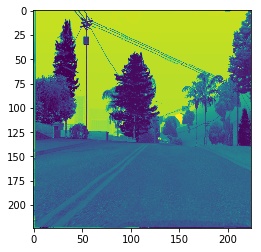

In [19]:
plt.imshow(img[500])
print(choice[500])

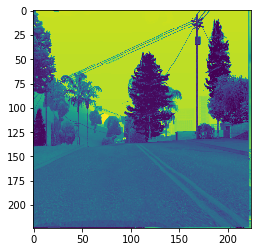

In [20]:
flp ,ch_flp = random_flip(img[500], choice[500])
plt.imshow(flp)

In [0]:
def process(img):
  img = np.reshape(img , (224,224,1))
  return img

In [95]:
x1 = img[500]
x2 = process(x1)
x2.shape


(224, 224, 1)

In [96]:
X[500].shape

(224, 224)

In [136]:
choic = choice[500]
print(choic)

[0 0 1]


In [0]:
def random_augment(image,steer):
  
  if np.random.rand()<0.5:
    image = pan(image)
  if np.random.rand()<0.5:
    image = zoom(image)
  if np.random.rand()<0.5:
    image, steer = random_flip(image,steer)
  return image,steer

In [0]:
def batch_generator(image ,choices ,batch_size ,  istraining):
  while True:
    batch_img = []
    batch_choice = []
    
    for i in range(batch_size):
      random_ind = random.randint(0,len(image)-1)
      if istraining:
        im , choic = random_augment(image[random_ind],choices[random_ind])
      else :
        im = image[random_ind]
        choic = choices[random_ind]
        
#       im = process(im)
      batch_img.append(im)
      
      batch_choice.append(choic)
    yield (np.asarray(batch_img).reshape(-1,224,224,1),np.asarray(batch_choice))

In [151]:
X_train_gen, y_train_gen =next(batch_generator(X, Y, 100, 1))

# plt.imshow(X_train_gen[0])
# X_train_gen.shape
print(y_train_gen)


[[1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


In [154]:
h =model.fit_generator(batch_generator(X,Y,100,1) , steps_per_epoch = 1000, epochs = 10 , validation_data = batch_generator(test_x, test_y ,100 ,0), validation_steps = 800, verbose = 1 , shuffle = 1)

Epoch 1/10
1000/1000 [==============================] - 134s 134ms/step - loss: 0.4539 - acc: 0.8274 - val_loss: 0.7201 - val_acc: 0.7577
Epoch 2/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.3665 - acc: 0.8626 - val_loss: 0.4479 - val_acc: 0.8503
Epoch 3/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.3266 - acc: 0.8785 - val_loss: 0.3367 - val_acc: 0.8734
Epoch 4/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.2985 - acc: 0.8869 - val_loss: 0.3348 - val_acc: 0.8906
Epoch 5/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.2749 - acc: 0.8985 - val_loss: 0.3347 - val_acc: 0.8818
Epoch 6/10
1000/1000 [==============================] - 134s 134ms/step - loss: 0.2642 - acc: 0.9027 - val_loss: 0.3203 - val_acc: 0.8926
Epoch 7/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.2406 - acc: 0.9101 - val_loss: 0.2787 - val_acc: 0.8789
Epoch 8/10
1000/1000 [============

Text(0.5, 1.0, 'loss')

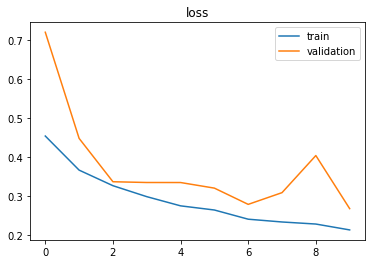

In [155]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['train','validation'])
plt.title('loss')

In [0]:
model.save('gta_model.h5')